In [294]:
import pandas as pd
processedDataLemma = pd.read_csv('processedDataLemma.csv')
processedDataLemma.head(2)


,full_news,Label,full_news_no_stopwords,full_news_no_ner,full_news_lemma,full_news_lemma_clean
0,الضفة الغربية الاحتلال يهدم منزلا تاريخيا ومس...,1,الضفة الغربية الاحتلال يهدم منزلا تاريخيا ومسي...,الضفة الغربية الاحتلال يهدم منزلا تاريخيا ومسي...,ضِفَّة غَربِيّ اِحتِلَال هَدَم مَنزِل تَارِيخِ...,ضفة غربي احتلال هدم منزل تاريخي و مسيرة ندد ب ...
1,مظاهرات بمدن اوروبية تضامنا مع غزة وحشود امام ...,1,مظاهرات بمدن اوروبية تضامنا غزة وحشود داونينغ ...,مظاهرات بمدن تضامنا وحشود خرجت مظاهرات المد...,مُظَاهَرَة بِ مَدِينَة أَضَام هُوَ وَ حَشد خَر...,مظاهرة ب مدينة أضام هو و حشد خرج مظاهرة مدينة ...


In [295]:
processedDataLemma['Label'].value_counts()


Label
1    3913
0    1438
Name: count, dtype: int64

In [296]:
processedDataLemma = processedDataLemma.drop(columns=['full_news','full_news_no_stopwords','full_news_no_ner','full_news_lemma'], axis=1)

In [297]:
processedDataLemma

,Label,full_news_lemma_clean
0,1,ضفة غربي احتلال هدم منزل تاريخي و مسيرة ندد ب ...
1,1,مظاهرة ب مدينة أضام هو و حشد خرج مظاهرة مدينة ...
2,1,شهيد و ضرب تنديد ب مجزرة استشهد و اعتقل عشرة آ...
3,1,خسارة عدو أكبر ب كثير أعلن و س جعل ل عنة تاريخ...
4,1,شهيد ب ضفة و احتلال شن حملة اعتقال استشهد مواج...
...,...,...
5346,1,حرب مباشر مقاومة تكبد احتلال خسارة كبير و خلاف...
5347,0,تصريح قديم ل مقتل اشتباك حرب جاري تداول حساب و...
5348,0,الفيديو هدد قديم حرب تداول صفحة و حساب موقعي ت...
5349,1,دعم قطعة دعم منظمة دولي نشر تقرير دقيق تقاطع ر...


In [298]:
# separating the data & label
X = processedDataLemma['full_news_lemma_clean']
Y = processedDataLemma['Label']

In [299]:
X

0       ضفة غربي احتلال هدم منزل تاريخي و مسيرة ندد ب ...
1       مظاهرة ب مدينة أضام هو و حشد خرج مظاهرة مدينة ...
2       شهيد و ضرب تنديد ب مجزرة استشهد و اعتقل عشرة آ...
3       خسارة عدو أكبر ب كثير أعلن و س جعل ل عنة تاريخ...
4       شهيد ب ضفة و احتلال شن حملة اعتقال استشهد مواج...
                              ...                        
5346    حرب مباشر مقاومة تكبد احتلال خسارة كبير و خلاف...
5347    تصريح قديم ل مقتل اشتباك حرب جاري تداول حساب و...
5348    الفيديو هدد قديم حرب تداول صفحة و حساب موقعي ت...
5349    دعم قطعة دعم منظمة دولي نشر تقرير دقيق تقاطع ر...
5350    لصر خريطة و مصدر مفتوح مساعدة معرفة حي و مبنى ...
Name: full_news_lemma_clean, Length: 5351, dtype: object

In [300]:
print(type(X)) 

<class 'pandas.core.series.Series'>


In [301]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5346    1
5347    0
5348    0
5349    1
5350    1
Name: Label, Length: 5351, dtype: int64

In [302]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectorizer.fit(X)

X = vectorizer.transform(X)

In [303]:
print(X.shape)         
print(X.toarray())

(5351, 50000)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [304]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 796271 stored elements and shape (5351, 50000)>
  Coords	Values
  (0, 14)	0.03352375194165556
  (0, 128)	0.04954809781946378
  (0, 344)	0.026121167042346412
  (0, 843)	0.021130229257704216
  (0, 917)	0.04820228706289729
  (0, 951)	0.025577387683889966
  (0, 1219)	0.02398543688094428
  (0, 1223)	0.03223242885636319
  (0, 1247)	0.0452827987864584
  (0, 1248)	0.047618739740122436
  (0, 1407)	0.03823591494632399
  (0, 1637)	0.028328077700785204
  (0, 1653)	0.03618573845168364
  (0, 1765)	0.041527318289219496
  (0, 1776)	0.04954809781946378
  (0, 1787)	0.03954421970647366
  (0, 2083)	0.020503759782185264
  (0, 2084)	0.04954809781946378
  (0, 2227)	0.02517203390578155
  (0, 2754)	0.019394723878978674
  (0, 2898)	0.03895669589677197
  (0, 2902)	0.03928032989762005
  (0, 2962)	0.05226737530364077
  (0, 3236)	0.03693766022810704
  (0, 3244)	0.05723522922345284
  :	:
  (5350, 46735)	0.016443541129988377
  (5350, 46916)	0.0438349009971

In [305]:
#Splitting the dataset to training & test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [306]:
print(Y_train.value_counts())


Label
1    3130
0    1150
Name: count, dtype: int64


In [307]:
print(Y_test.value_counts())


Label
1    783
0    288
Name: count, dtype: int64


In [308]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\best tech\appdata\local\programs\python\python311\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy score of the training data :  0.9109813084112149
Accuracy score of the test data :  0.8711484593837535


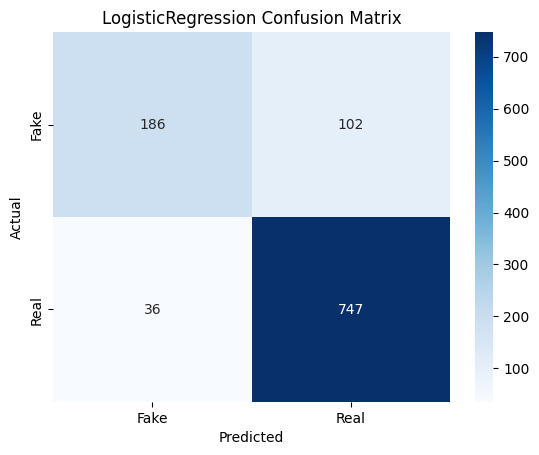

              precision    recall  f1-score   support

        Fake       0.84      0.65      0.73       288
        Real       0.88      0.95      0.92       783

    accuracy                           0.87      1071
   macro avg       0.86      0.80      0.82      1071
weighted avg       0.87      0.87      0.87      1071



In [309]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
# Confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],   # 0 = Fake, 1 = Real
            yticklabels=['Fake', 'Real'])   # نفس الترتيب
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

# Classification report
print(classification_report(Y_test, X_test_prediction, target_names=["Fake", "Real"]))

# احفظي النموذج
pickle.dump(model, open("LogisticRegression_model.pkl", "wb"))


Accuracy score of the training data :  0.9654205607476636
Accuracy score of the test data :  0.8832866479925303


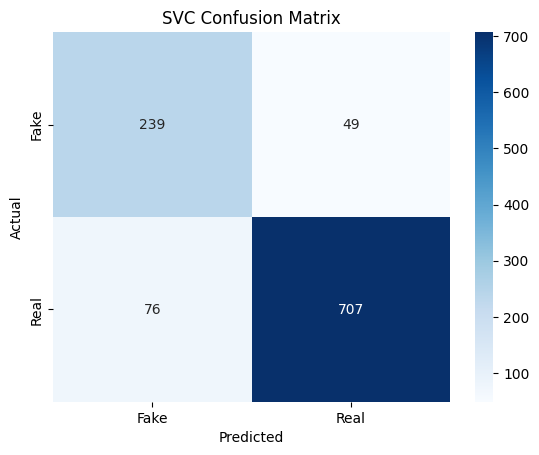

              precision    recall  f1-score   support

        Fake       0.76      0.83      0.79       288
        Real       0.94      0.90      0.92       783

    accuracy                           0.88      1071
   macro avg       0.85      0.87      0.86      1071
weighted avg       0.89      0.88      0.88      1071



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# تدريب نموذج SVC بدعم الاحتمالات وحل مشكلة توازن البيانات
model = SVC(kernel='linear', probability=True, class_weight='balanced')
model.fit(X_train, Y_train)

# التنبؤ على مجموعة الاختبار
Y_pred = model.predict(X_test)

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

# (Confusion Matrix)
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()


print(classification_report(Y_test, Y_pred, target_names=["Fake", "Real"]))


pickle.dump(model, open("svm_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


In [311]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))

In [312]:
import re
import requests

# تحميل قائمة الكلمات التوقفية
url = "https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt"
response = requests.get(url)
arabic_stopwords = set(response.text.splitlines())

def clean_arabic_text(text):
    if not isinstance(text, str):
        return ""

    # إزالة الروابط و HTML
    text = re.sub(r'http\S+|www.\S+|pic\.twitter\.com/\S+', '', text)
    text = re.sub(r'<.*?>', '', text)

    # إزالة الإيموجي
    emoji_pattern = re.compile("["       
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # إزالة التشكيل
    text = re.sub(r'[\u064B-\u0652]', '', text)

    # توحيد الحروف
    text = re.sub(r'[إأآا]', 'ا', text)

    # إزالة علامات الترقيم
    text = re.sub(r'[ـ،؛؟!:\.\,\(\)\[\]\{\}"\'«»\-_~…]', '', text)

    # الاحتفاظ فقط بالحروف العربية
    lines = text.split('\n')
    cleaned_lines = []
    for line in lines:
        if re.fullmatch(r'[^\u0600-\u06FF]+', line.strip()):
            continue
        line = re.sub(r'[^\u0600-\u06FF\s]', '', line)
        if line.strip():
            cleaned_lines.append(line.strip())
    
    clean_text = '\n'.join(cleaned_lines)

    # إزالة الكلمات التوقفية
    clean_words = [word for word in clean_text.split() if word not in arabic_stopwords]
    final_text = ' '.join(clean_words)
    return final_text

In [316]:
import pickle

model = pickle.load(open("svm_model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))


def predict_news(text):
    
    cleaned_text = clean_arabic_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]
#    
    probabilities = model.predict_proba(vector)[0]

    confidence = round(probabilities[prediction] * 100, 2)  # النسبة المئوية
    label = "Real News" if prediction == 1 else "Fake News"

    return label, confidence


texts = ["""بادني مستوى إطلاق تقرير فلسطيني أظهر تراجع مؤشرات اقتصادية واجتماعية في الضفة الغربية وقطاع غزة. نقلت مصادر محلية عن دراسة حديثة أن معدلات البطالة والفقر وصلت إلى مستويات غير مسبوقة منذ سنوات، مدفوعة بتأثيرات الحصار وقيود التنقل.

وكشف التقرير أن الأوضاع الأمنية المتقلبة وتدهور البنية التحتية زادت من معاناة السكان، ما أثار قلق واسع بين المسؤولين الفلسطينيين والمجتمع المدني. وعبّر مسؤول رفيع عن استيائه من تدهور الخدمات الأساسية، قائلاً إن الوضع الراهن “غير مقبول ويتطلب تدخل عاجل”.

وأشار التقرير إلى أن الشباب الفلسطيني يشكلون أكبر فئة متضررة، حيث أن فرص التعليم والعمل تراجعت بشكل ملحوظ. وذكر تقرير محلي أن ارتفاع أسعار السلع والخدمات يضغط على الأسر الفقيرة، مما زاد من حجم الاحتجاجات الشعبية في المدن الفلسطينية.

ورغم المحاولات الدولية لتقديم الدعم، ما زالت التحديات كثيرة، وأكدت منظمات حقوق الإنسان ضرورة تعزيز الجهود لرفع الحصار وتحقيق استقرار دائم. واستقر معدل قبول السكان للأوضاع الحالية عند مستويات منخفضة، ما يعكس حالة الإحباط العام بين المواطنين.""","""الادعاء بخصوص تدمير مساعدات من شركات تدعم إسرائيل بدون إثبات أو مصدر موثوق.""","""الفيديو اشتباك مقاومة تداول حساب و صفحة موقع تواصل اجتماعي ، قليل ، مقطع فيديو أدعى اشتباك عنيف مقاومة مستوطنة غلاف عملية طوفان أقصىمما زاد من حجم الاحتجاجات الشعبية

"""]
for t in texts:
    

    print("النص:", t)
    label, confidence = predict_news(t)
    print(f"Prediction: {label} with {confidence}% confidence")
    print("-" * 40)


النص: بادني مستوى إطلاق تقرير فلسطيني أظهر تراجع مؤشرات اقتصادية واجتماعية في الضفة الغربية وقطاع غزة. نقلت مصادر محلية عن دراسة حديثة أن معدلات البطالة والفقر وصلت إلى مستويات غير مسبوقة منذ سنوات، مدفوعة بتأثيرات الحصار وقيود التنقل.

وكشف التقرير أن الأوضاع الأمنية المتقلبة وتدهور البنية التحتية زادت من معاناة السكان، ما أثار قلق واسع بين المسؤولين الفلسطينيين والمجتمع المدني. وعبّر مسؤول رفيع عن استيائه من تدهور الخدمات الأساسية، قائلاً إن الوضع الراهن “غير مقبول ويتطلب تدخل عاجل”.

وأشار التقرير إلى أن الشباب الفلسطيني يشكلون أكبر فئة متضررة، حيث أن فرص التعليم والعمل تراجعت بشكل ملحوظ. وذكر تقرير محلي أن ارتفاع أسعار السلع والخدمات يضغط على الأسر الفقيرة، مما زاد من حجم الاحتجاجات الشعبية في المدن الفلسطينية.

ورغم المحاولات الدولية لتقديم الدعم، ما زالت التحديات كثيرة، وأكدت منظمات حقوق الإنسان ضرورة تعزيز الجهود لرفع الحصار وتحقيق استقرار دائم. واستقر معدل قبول السكان للأوضاع الحالية عند مستويات منخفضة، ما يعكس حالة الإحباط العام بين المواطنين.
Prediction: Real News with 91.28%